Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

Petición http para leer el código HTML de una página web

In [2]:
url = "https://es.wikipedia.org/wiki/Europa"
respuesta = requests.get(url)
if respuesta.status_code == 200:
    print('Ok')
else:
    print( 'No ok')

Ok


Visualización del código HTML

In [3]:
codigoHTML = respuesta.text
codigoHTML

'<!DOCTYPE html>\n<html class="client-nojs" lang="es" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Europa - Wikipedia, la enciclopedia libre</title>\n<script>document.documentElement.className="client-js";(function(){var cookie=document.cookie.match(/(?:^|; )eswikimwclientprefs=([^;]+)/);if(cookie){var featureName=cookie[1];document.documentElement.className=document.documentElement.className.replace(featureName+\'-enabled\',featureName+\'-disabled\');}}());RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","enero","febrero","marzo","abril","mayo","junio","julio","agosto","septiembre","octubre","noviembre","diciembre"],"wgRequestId":"8860a991-89ea-4cd0-9044-5b9eaf66ef4a","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Europa","wgTitle":"Europa","wgCurRevisionId":149583838,"wgRevisionId":149583838,"wgArticle

Lista de tablas contenidas en la página web

In [4]:
lista_df = pd.read_html(codigoHTML, header=0)
len(lista_df)

10

Nos quedamos con una lista con datos de países europeos. Mostramos las 5 primeras líneas y las etiquetas de sus columnas. 

In [5]:
europa=lista_df[1]
europa.head(3)

,Bandera,Nombre/Nombre oficial,Establecido,Superficie (km²),Población,Habitantes por km²,Capital,Idioma(s) oficial(es)
0,NaN,Albania República de Albania,1912,28 748,3 038 594,1056,Tirana,sq
1,NaN,Alemania República Federal de Alemania,1871,357 022,80 722 792,2261,Berlín,de
2,NaN,Andorra Co-Principado de Andorra,1278,468,85 660,183,Andorra la Vieja,ca


In [6]:
europa.columns

Index(['Bandera', 'Nombre/Nombre oficial', 'Establecido', 'Superficie (km²)',
       'Población', 'Habitantes  por km²', 'Capital', 'Idioma(s) oficial(es)'],
      dtype='object')

Corrección de columnas y filas con caractéres especiales

In [7]:
europa['Superficie (km²)'] = europa['Superficie (km²)'].str.replace(chr(160), '')
europa['Población'] = europa['Población'].str.replace(chr(160),'')
europa['Habitantes por km²'] = europa['Habitantes  por km²'].str.replace(chr(160),'')
europa = europa.drop([32, 35, 37])
europa.head(3)

,Bandera,Nombre/Nombre oficial,Establecido,Superficie (km²),Población,Habitantes por km²,Capital,Idioma(s) oficial(es)
0,NaN,Albania República de Albania,1912,28748,3038594,1056,Tirana,sq
1,NaN,Alemania República Federal de Alemania,1871,357022,80722792,2261,Berlín,de
2,NaN,Andorra Co-Principado de Andorra,1278,468,85660,183,Andorra la Vieja,ca


#### Ejercicio 1: Convierte a tipo numérico las datos almacenados en las columnas 'Superficie(km²)', 'Población', y 'Habitantes por km²'

In [8]:
europa['Superficie (km²)'] = pd.to_numeric(europa['Superficie (km²)'])
europa['Población'] = pd.to_numeric(europa['Población'])
europa['Habitantes  por km²'] = pd.to_numeric(europa['Habitantes  por km²'])

#### Ejercicio 2: Calcula la matriz de correlación y la matriz de covarianza del DataFrame 'europa'

In [9]:
europa.corr(numeric_only=True)

,Bandera,Superficie (km²),Población,Habitantes por km²
Bandera,NaN,NaN,NaN,NaN
Superficie (km²),NaN,1.000000,0.631581,-0.104401
Población,NaN,0.631581,1.000000,-0.084189
Habitantes por km²,NaN,-0.104401,-0.084189,1.000000


In [10]:
europa.cov(numeric_only= True)

,Bandera,Superficie (km²),Población,Habitantes por km²
Bandera,NaN,NaN,NaN,NaN
Superficie (km²),NaN,8.367565e+12,2.355317e+14,-1.161316e+09
Población,NaN,2.355317e+14,1.662043e+16,-4.173693e+10
Habitantes por km²,NaN,-1.161316e+09,-4.173693e+10,1.478736e+07


#### Ejercicio 3: Representa la matriz de correlación con un mapa de color (heatmap) y el gráfico de dispersión del par de variables con más correlación. 

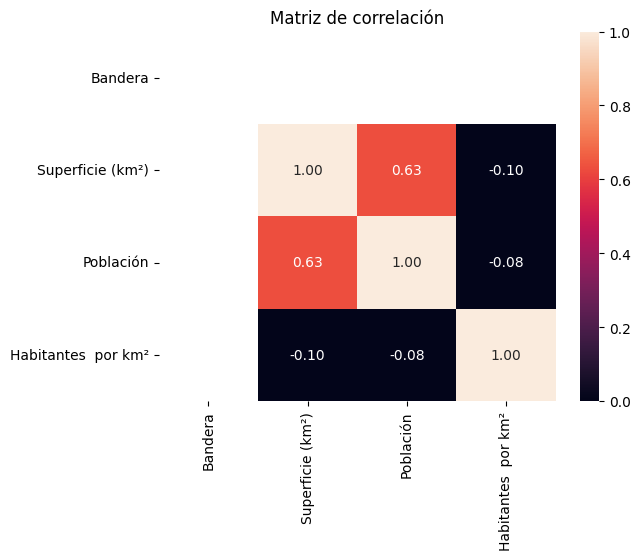

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

matriz_de_correlacion = sns.heatmap(europa.corr(numeric_only=True), 
                 vmin=0, vmax=1,annot = True, 
                 fmt = '.2f')
matriz_de_correlacion.set_title('Matriz de correlación')
plt.show()

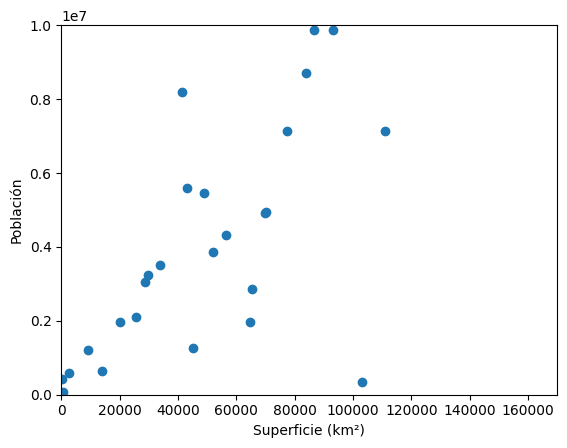

In [20]:
import matplotlib.pyplot as plt

x = europa['Superficie (km²)']
y = europa['Población']
plt.scatter(x, y)
#Como se ve mal, vamos a reducir la dimensión
plt.xlim([0,170000])
plt.ylim([0,10000000])
#Nombres de los ejes
plt.xlabel('Superficie (km²)')
plt.ylabel('Población')
plt.show()